In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


In [ ]:
data = pd.read_csv("OnlineRetail.csv")  # Replace with your actual file path


In [ ]:
# Check for missing values
print(data.isnull().sum())

# Handle missing values (example: impute with mean)
data["Quantity"] = data["Quantity"].fillna(data["Quantity"].mean())


InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [ ]:
# IQR based outlier detection (example)
Q1 = data["UnitPrice"].quantile(0.25)
Q3 = data["UnitPrice"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

# Remove outliers (example)
data = data[(data["UnitPrice"] > lower_bound) & (data["UnitPrice"] < upper_bound)]


In [ ]:
# Encode categorical features (example)
le = LabelEncoder()
data["InvoiceNo"] = le.fit_transform(data["InvoiceNo"])


In [ ]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[["UnitPrice", "Quantity"]])


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


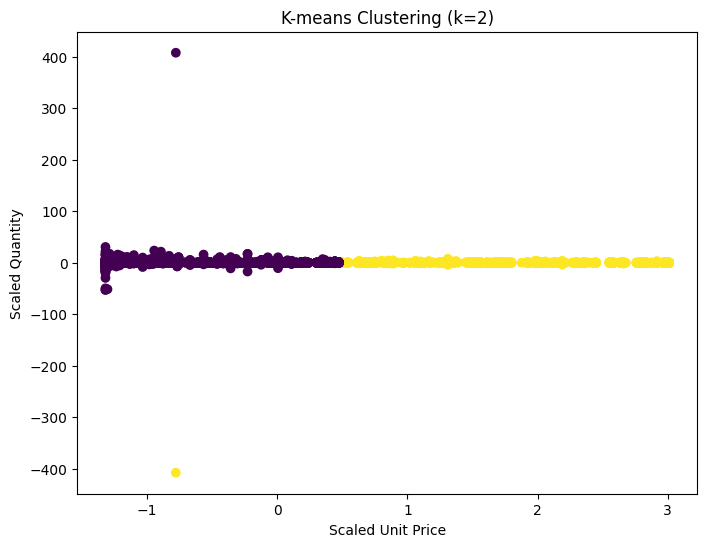

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


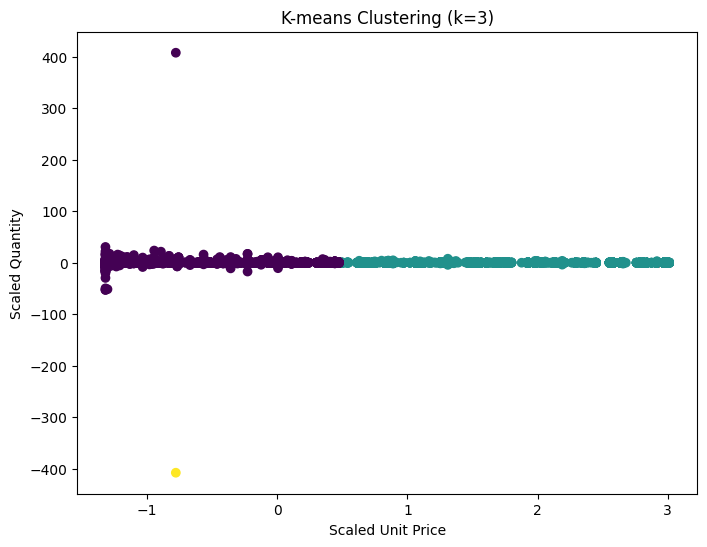

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


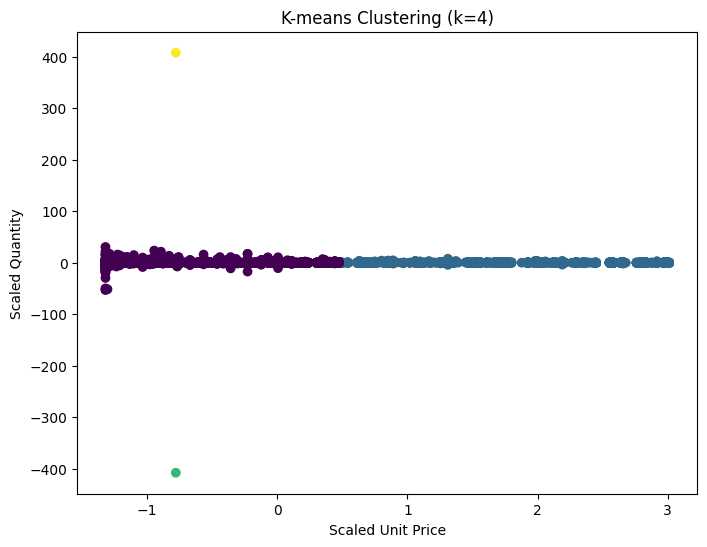

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


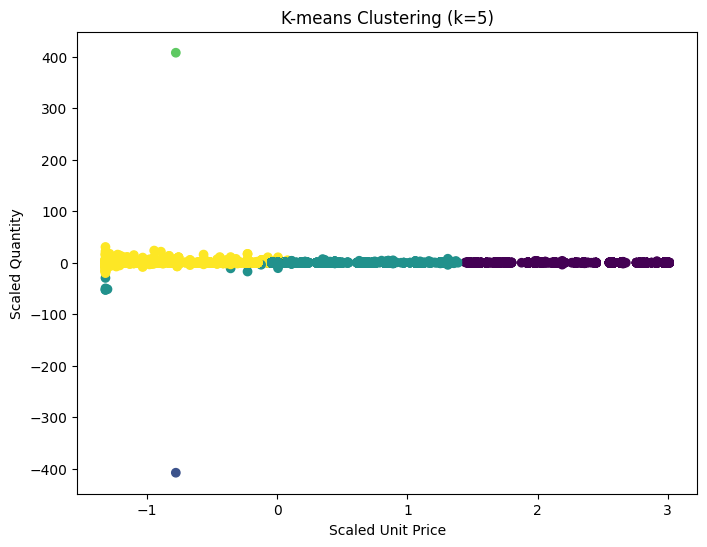

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


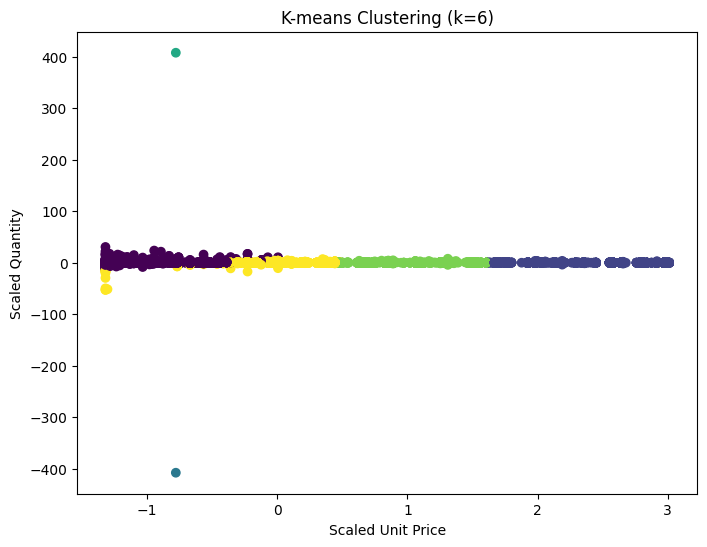

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


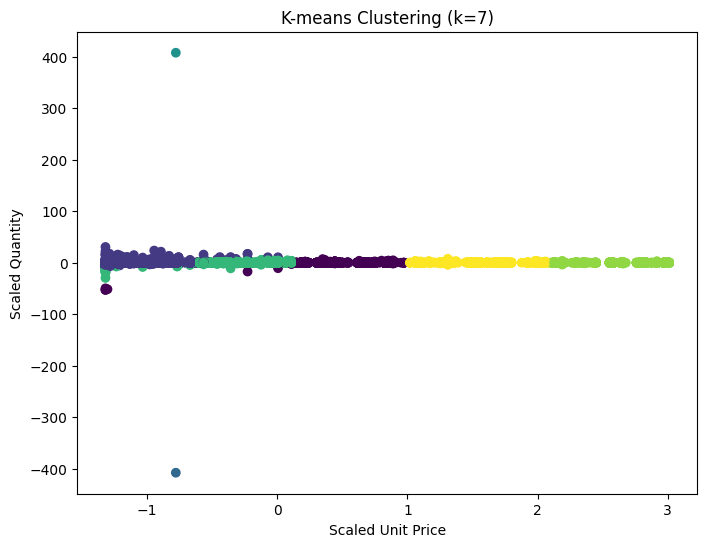

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


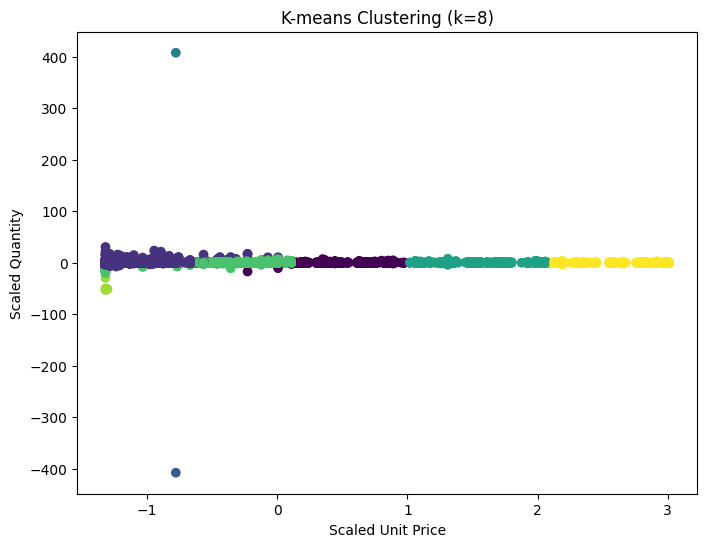

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


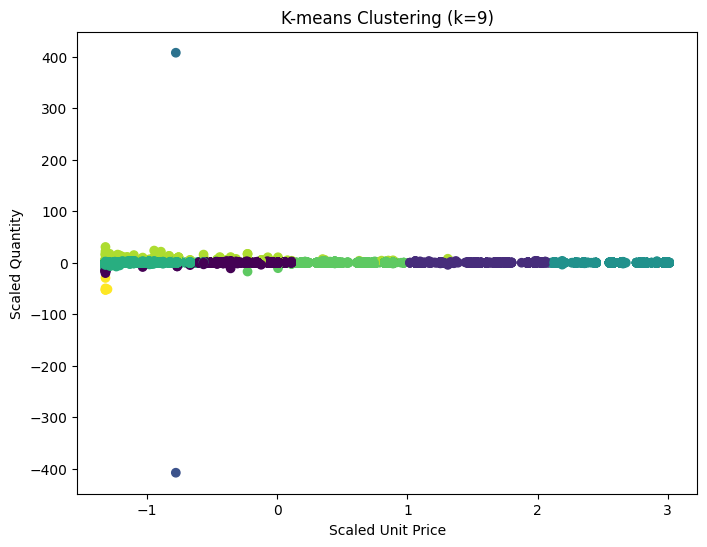

In [ ]:
#kmeans
for k in range(2, 10):
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(scaled_data)


  cluster_labels = kmeans.labels_


  plt.figure(figsize=(8, 6))
  plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=cluster_labels)
  plt.title(f"K-means Clustering (k={k})")
  plt.xlabel("Scaled Unit Price")
  plt.ylabel("Scaled Quantity")
  plt.show()


In [ ]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Pre-processed data from K-means can be reused here (X_scaled)

# Perform Agglomerative clustering with visualization for different k
for k in range(2, 10):
  cluster = AgglomerativeClustering(n_clusters=k, linkage='ward')
  cluster.fit_predict(scaled_data)

  cluster_labels = cluster.labels_

  plt.figure(figsize=(8, 6))
  plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=cluster_labels)
  plt.title(f"Agglomerative Clustering (k={k})")
  plt.xlabel("Scaled Unit Price")
  plt.ylabel("Scaled Quantity")
  plt.show()

In [ ]:
For the Online Retail dataset:

We might not know the optimal number of customer segments beforehand (disadvantage of K-means).
The data might not perfectly form spherical clusters (disadvantage of K-means).
Therefore, based on these considerations and the characteristics of the Online Retail dataset,
Agglomerative Clustering appears to be a better choice for this specific case. It allows us to explore the hierarchy and determine the most suitable number of customer
segments without pre-defining k. Additionally, it can handle potentially non-spherical customer behavior patterns in the data.